In [120]:
#python 3
%pylab inline

import numpy as np
import numpy.ma as ma
#from matplotlib.pyplot import plot,scatter,savefig,figure,colorbar,suptitle,close,show,subplot,rgrids, contourf, contour
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import datetime 
from operator import *
from matplotlib.dates import DateFormatter
import pandas as pd
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


/Users/Eren/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['add', 'legend', 'matmul', 'invert', 'mod', 'inv']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [121]:
CS650=pd.read_csv('/Users/Eren/Desktop/data/CS650 and CS215 data/Level 6/CS650s_plusWS_thetas_18Apr28.csv')#,encoding='utf-8-sig') #utf-8-sig removes non-printing character in first column header
CS650.head()

TIMESTAMP  RECORD  BattV_Min  EC_Avg     EC  P_Avg      P  \
0  2017-09-28 08:00:00       0      12.96   0.002  0.003  2.455  2.454   
1  2017-09-28 08:15:00       1      12.96   0.002  0.002  2.455  2.455   
2  2017-09-28 08:30:00       2      12.93   0.002  0.002  2.455  2.455   
3  2017-09-28 08:45:00       3      12.96   0.002  0.002  2.455  2.455   
4  2017-09-28 09:00:00       4      12.96   0.002  0.003  2.455  2.454   

      Theta  T_Avg      T    ...      P_WS1_Avg  Theta_WS1  VWC_WS2_Avg  \
0  0.015435  16.31  16.34    ...          3.407   0.040270        0.097   
1  0.015435  16.31  16.30    ...          3.407   0.040270        0.096   
2  0.015435  16.29  16.32    ...          3.408   0.040296        0.096   
3  0.015435  16.28  16.27    ...          3.407   0.040270        0.096   
4  0.015435  16.27  16.27    ...          3.407   0.040270        0.096   

   T_WS2_Avg  P_WS2_Avg  Theta_WS2  VWC_WS3_Avg  T_WS3_Avg  P_WS3_Avg  \
0      16.20      5.705   0.096484        0.069      16.08      4.535   
1      16.20      5.705   0.096484        0.069      16.09      4.535   
2      16.19      5.705   0.096484        0.069      16.09      4.535   
3      16.19      5.705   0.096484        0.069      16.08      4.535   
4      16.18      5.705   0.096484        0.069      16.08      4.535   

   Theta_WS3  
0   0.068512  
1   0.068512  
2   0.068512  
3   0.068512  
4   0.068512  

[5 rows x 127 columns]

In [122]:
rainfallCmt=pd.read_csv('/Users/Eren/Desktop/data/weather data/Rainfall_Cumulative_mm_WSAM_WY17-18.csv')
rainfallCmt.head()

ValueID  DataValue        LocalDateTime  UTCOffset SiteCode  \
0  516282140          0  2017-10-01 00:00:00         -8     wsam   
1  516282141          0  2017-10-01 00:05:00         -8     wsam   
2  516282142          0  2017-10-01 00:10:00         -8     wsam   
3  516282143          0  2017-10-01 00:15:00         -8     wsam   
4  516282144          0  2017-10-01 00:20:00         -8     wsam   

             VariableCode QualifierCode                   MethodName  \
0  Rainfall Cumulative mm             P  Derived Cumulative Rainfall   
1  Rainfall Cumulative mm             P  Derived Cumulative Rainfall   
2  Rainfall Cumulative mm             P  Derived Cumulative Rainfall   
3  Rainfall Cumulative mm             P  Derived Cumulative Rainfall   
4  Rainfall Cumulative mm             P  Derived Cumulative Rainfall   

   QualityControlLevelCode               DatastreamName       StationName  
0                      2.1  Rainfall Cumulative mm WSAM  Angelo Meadow WS  
1                      2.1  Rainfall Cumulative mm WSAM  Angelo Meadow WS  
2                      2.1  Rainfall Cumulative mm WSAM  Angelo Meadow WS  
3                      2.1  Rainfall Cumulative mm WSAM  Angelo Meadow WS  
4                      2.1  Rainfall Cumulative mm WSAM  Angelo Meadow WS

In [123]:
rainfallTB4= pd.read_csv('/Users/Eren/Desktop/data/weather data/Rainfall_mm_TB4_WSHQ_WY17-18.csv')
rainfallTB4.head()

ValueID  DataValue        LocalDateTime  UTCOffset SiteCode VariableCode  \
0  529382412          0  2017-10-01 00:00:00         -8     wshq  Rainfall mm   
1  529382423          0  2017-10-01 00:05:00         -8     wshq  Rainfall mm   
2  529382434          0  2017-10-01 00:10:00         -8     wshq  Rainfall mm   
3  529382445          0  2017-10-01 00:15:00         -8     wshq  Rainfall mm   
4  529382456          0  2017-10-01 00:20:00         -8     wshq  Rainfall mm   

  QualifierCode         MethodName  QualityControlLevelCode  \
0             P  TB4mm-L Rain Gage                        2   
1             P  TB4mm-L Rain Gage                        2   
2             P  TB4mm-L Rain Gage                        2   
3             P  TB4mm-L Rain Gage                        2   
4             P  TB4mm-L Rain Gage                        2   

         DatastreamName   StationName  
0  Rainfall mm TB4 WSHQ  Angelo HQ WS  
1  Rainfall mm TB4 WSHQ  Angelo HQ WS  
2  Rainfall mm TB4 WSHQ  Angelo HQ WS  
3  Rainfall mm TB4 WSHQ  Angelo HQ WS  
4  Rainfall mm TB4 WSHQ  Angelo HQ WS

In [124]:


def legend(title, yaxis):#From Katelyn's code
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(yaxis)
    grd = plt.grid(True)
    plt.xticks(rotation= 60)
    ax = plt.gca()
    legend = ax.legend(loc='upper left')
    
    
#rainfall variables
date_rainTB4 = pd.to_datetime(rainfallTB4['LocalDateTime'])
date_rainCmt = pd.to_datetime(rainfallCmt['LocalDateTime'])
rainTB4=rainfallTB4['DataValue']
rainCmt=rainfallCmt['DataValue']
                        
#all CS650s #From Katelyn's code
date_CS650 = pd.to_datetime(CS650['TIMESTAMP'])
BattV_CS650= CS650['BattV_Min']
EC1_CS650 = CS650['EC_Avg']
EC2_CS650 = CS650['EC_2_Avg']
EC3_CS650 = CS650['EC_3_Avg']
EC4_CS650 = CS650['EC_4_Avg']
EC5_CS650 = CS650['EC_5_Avg']
EC6_CS650 = CS650['EC_6_Avg']
EC7_CS650 = CS650['EC_7_Avg']
EC8_CS650 = CS650['EC_8_Avg']
EC9_CS650 = CS650['EC_9_Avg']
EC10_CS650 = CS650['EC_10_Avg']
EC11_CS650 = CS650['EC_11_Avg']
EC12_CS650 = CS650['EC_12_Avg']
EC13_CS650 = CS650['EC_13_Avg']
EC14_CS650 = CS650['EC_14_Avg']
EC15_CS650 = CS650['EC_15_Avg']
EC16_CS650 = CS650['EC_16_Avg']
T1_CS650 = CS650['T_Avg']
T2_CS650 = CS650['T_2_Avg']
T3_CS650 = CS650['T_3_Avg']
T4_CS650 = CS650['T_4_Avg']
T5_CS650 = CS650['T_5_Avg']
T6_CS650 = CS650['T_6_Avg']
T7_CS650 = CS650['T_7_Avg']
T8_CS650 = CS650['T_8_Avg']
T9_CS650 = CS650['T_9_Avg']
T10_CS650 = CS650['T_10_Avg']
T11_CS650 = CS650['T_11_Avg']
T12_CS650 = CS650['T_12_Avg']
T13_CS650 = CS650['T_13_Avg']
T14_CS650 = CS650['T_14_Avg']
T15_CS650 = CS650['T_15_Avg']
T16_CS650 = CS650['T_16_Avg']
TWS1_CS650 = CS650['T_WS1_Avg']
TWS2_CS650 = CS650['T_WS2_Avg']
TWS3_CS650 = CS650['T_WS3_Avg']
P1_CS650 = CS650['P_Avg']
P2_CS650 = CS650['P_2_Avg']
P3_CS650 = CS650['P_3_Avg']
P4_CS650 = CS650['P_4_Avg']
P5_CS650 = CS650['P_5_Avg']
P6_CS650 = CS650['P_6_Avg']
P7_CS650 = CS650['P_7_Avg']
P8_CS650 = CS650['P_8_Avg']
P9_CS650 = CS650['P_9_Avg']
P10_CS650 = CS650['P_10_Avg']
P11_CS650 = CS650['P_11_Avg']
P12_CS650 = CS650['P_12_Avg']
P13_CS650 = CS650['P_13_Avg']
P14_CS650 = CS650['P_14_Avg']
P15_CS650 = CS650['P_15_Avg']
P16_CS650 = CS650['P_16_Avg']
PWS1_CS650 = CS650['P_WS1_Avg']
PWS2_CS650 = CS650['P_WS2_Avg']
PWS3_CS650 = CS650['P_WS3_Avg']
TH1_CS650 = CS650['Theta']
TH2_CS650 = CS650['Theta_2']
TH3_CS650 = CS650['Theta_3']
TH4_CS650 = CS650['Theta_4']
TH5_CS650 = CS650['Theta_5']
TH6_CS650 = CS650['Theta_6']
TH7_CS650 = CS650['Theta_7']
TH8_CS650 = CS650['Theta_8']
TH9_CS650 = CS650['Theta_9']
TH10_CS650 = CS650['Theta_10']
TH11_CS650 = CS650['Theta_11']
TH12_CS650 = CS650['Theta_12']
TH13_CS650 = CS650['Theta_13']
TH14_CS650 = CS650['Theta_14']
TH15_CS650 = CS650['Theta_15']
TH16_CS650 = CS650['Theta_16']
THWS1_CS650 = CS650['Theta_WS1']
THWS2_CS650 = CS650['Theta_WS2']
THWS3_CS650 = CS650['Theta_WS3']

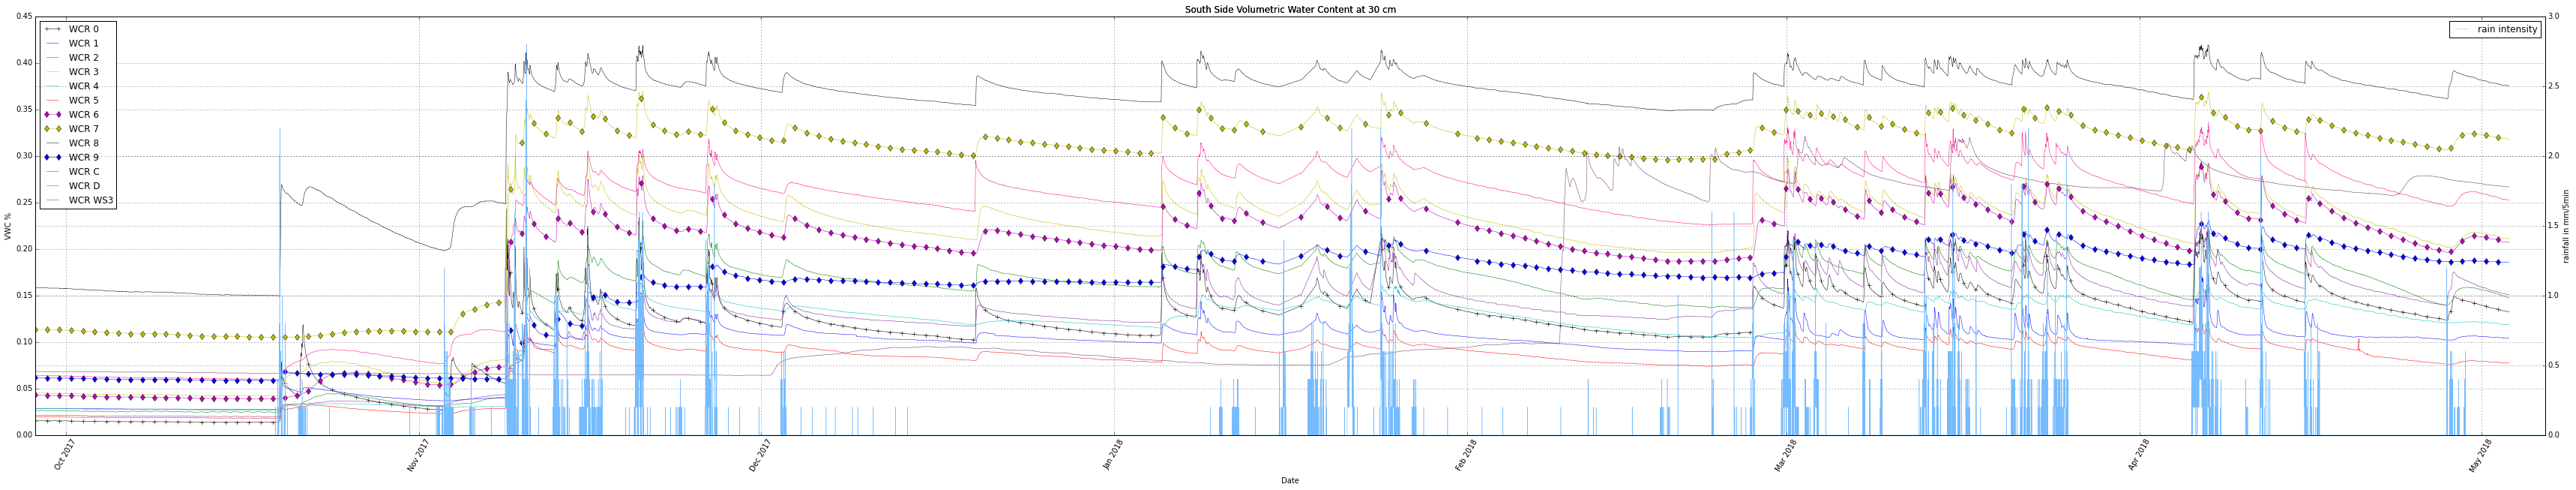

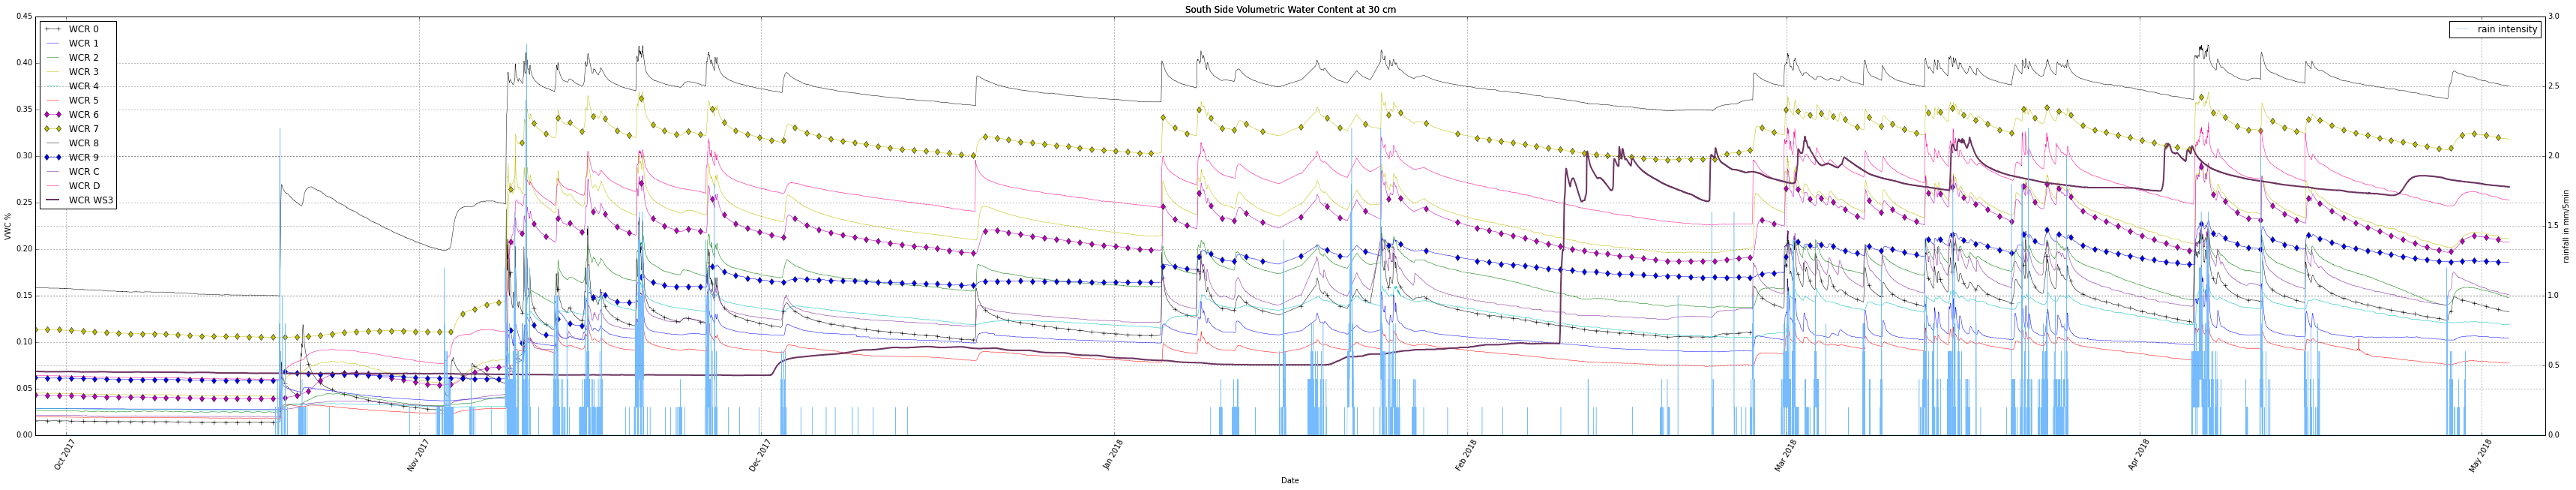

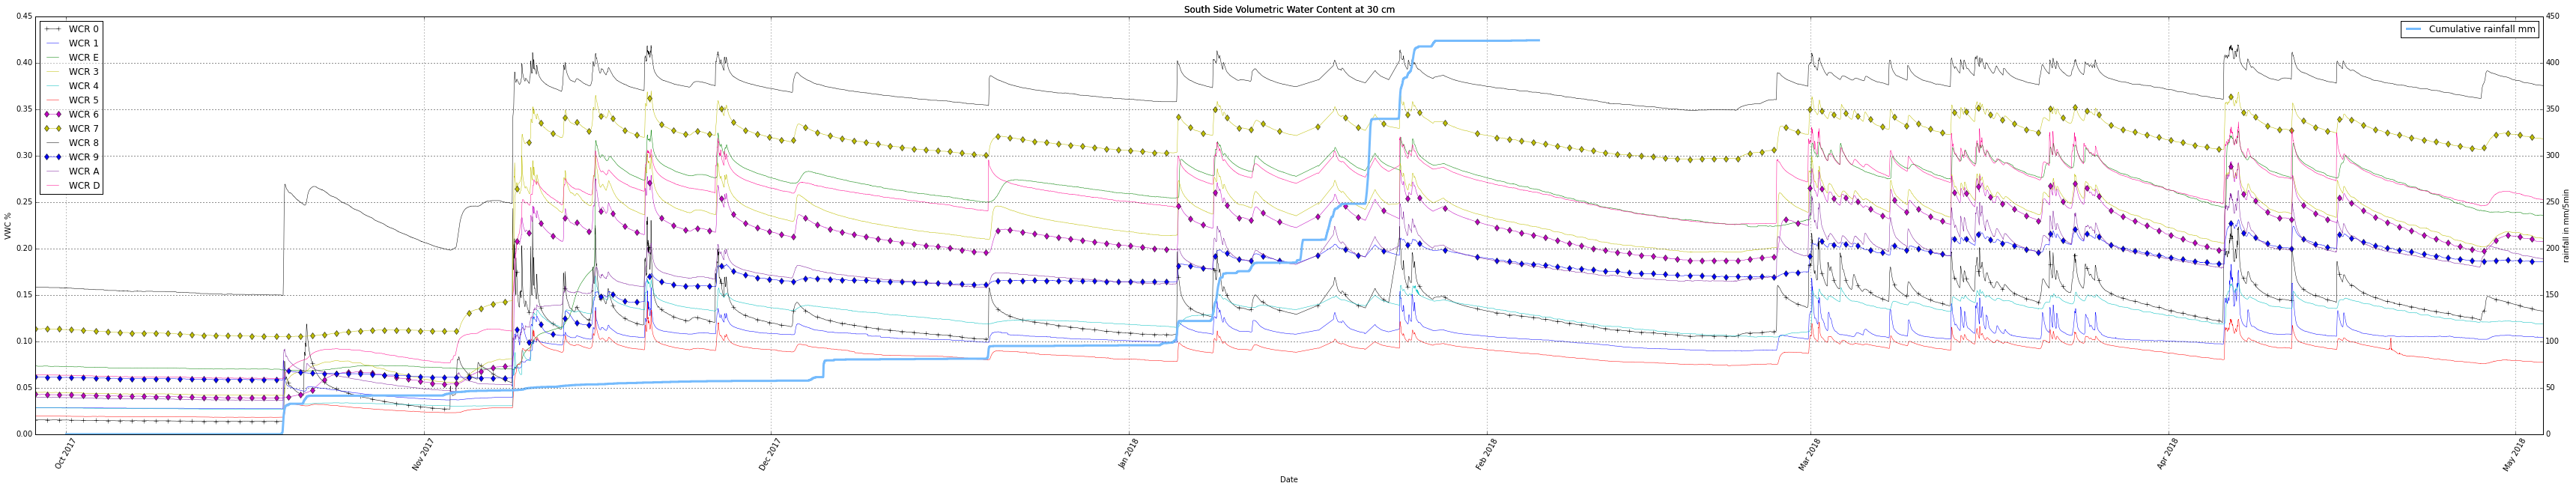

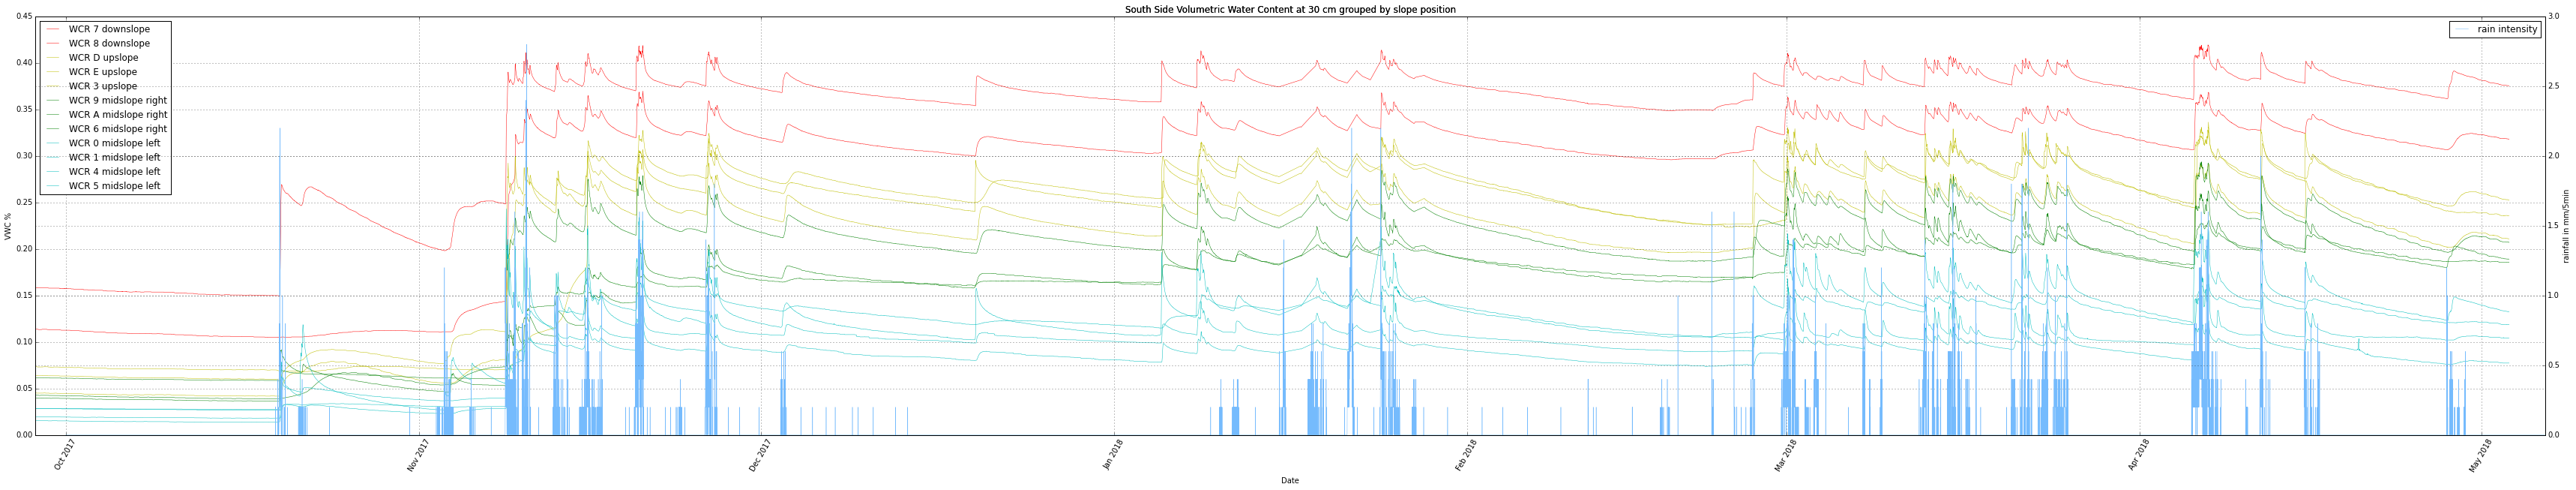

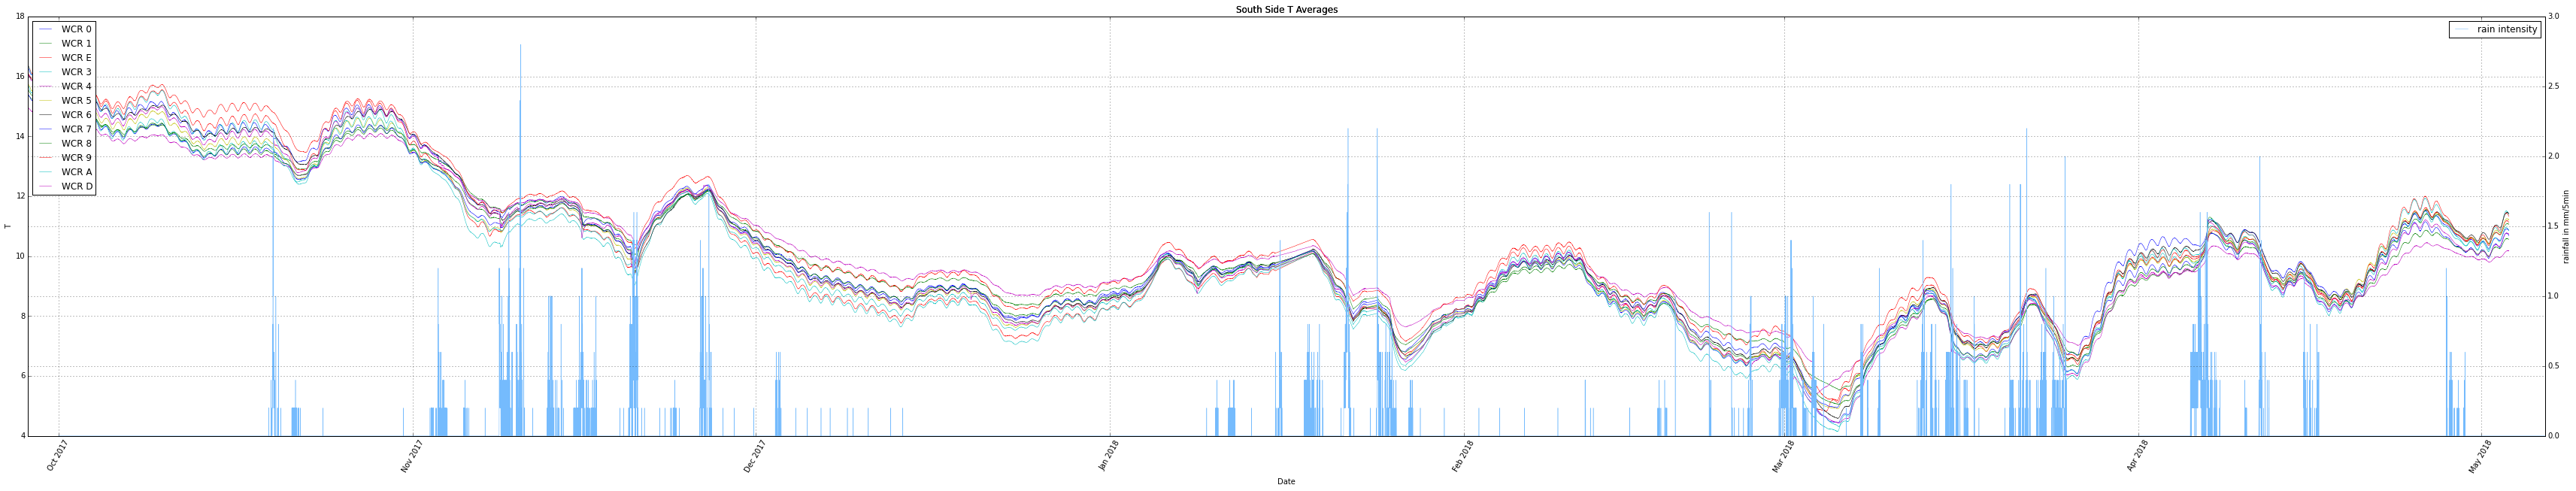

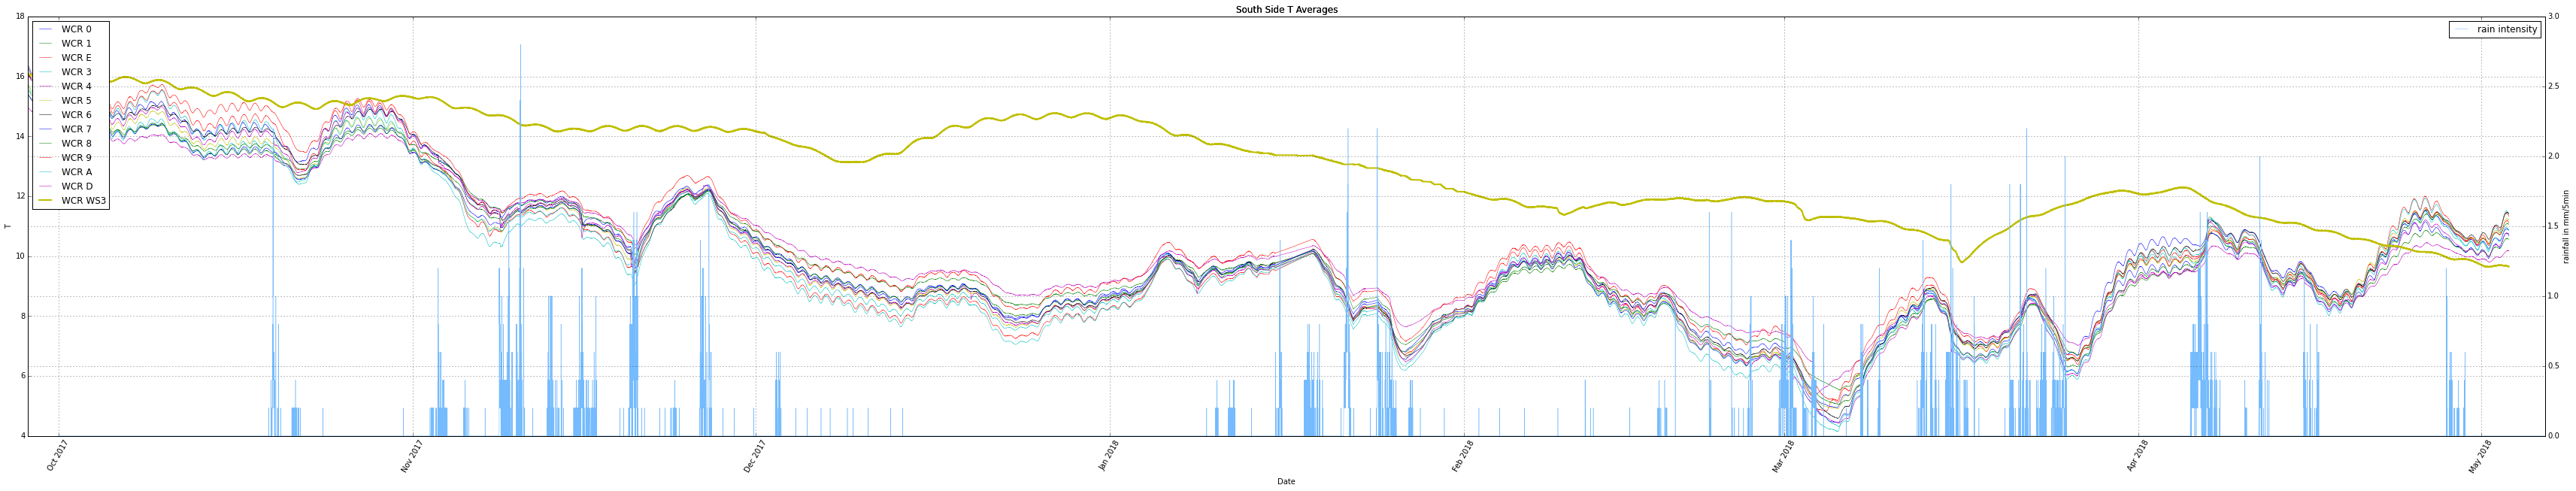

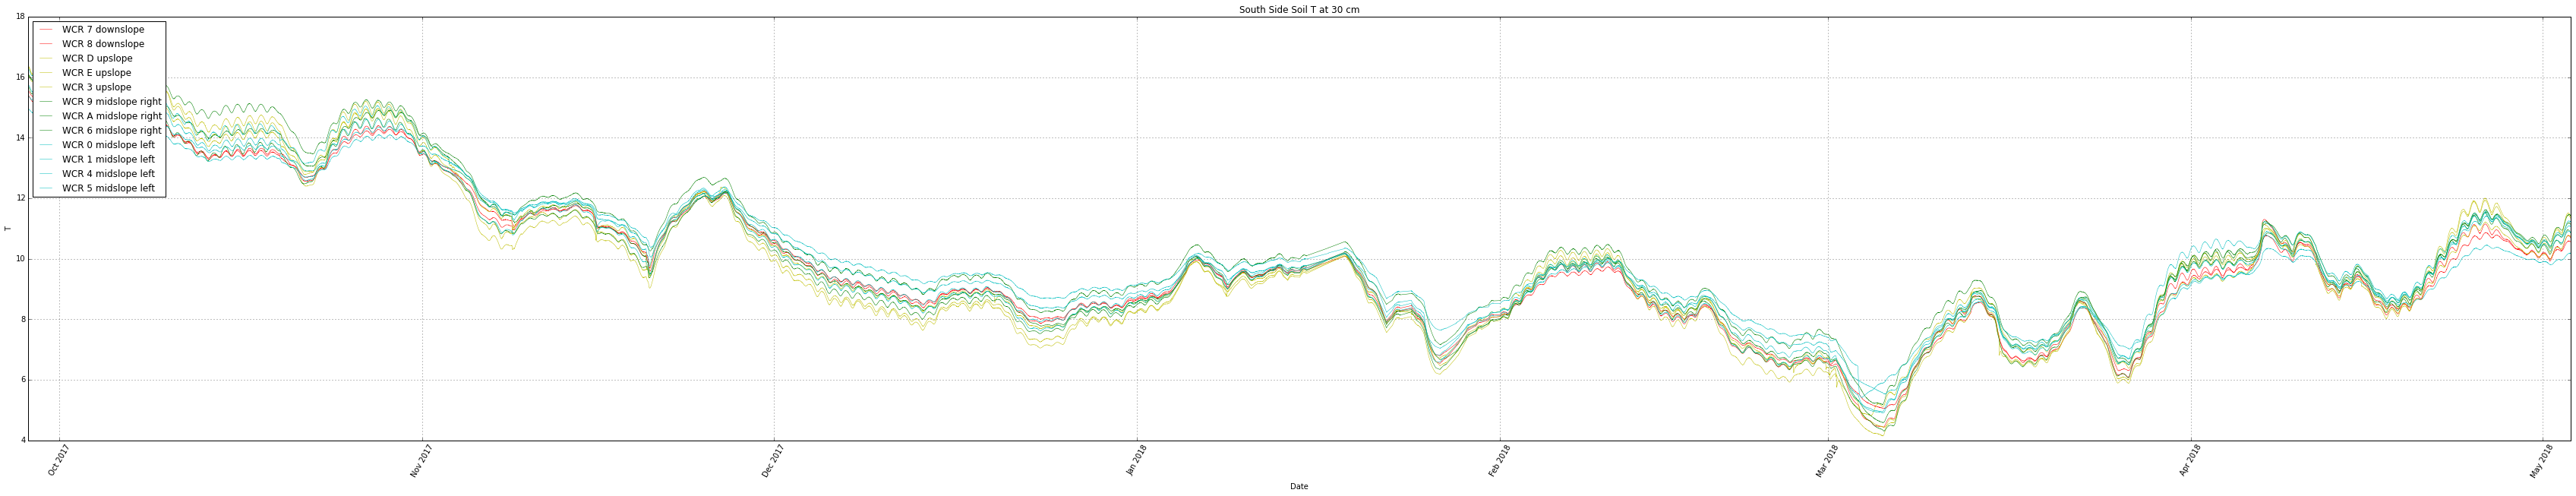

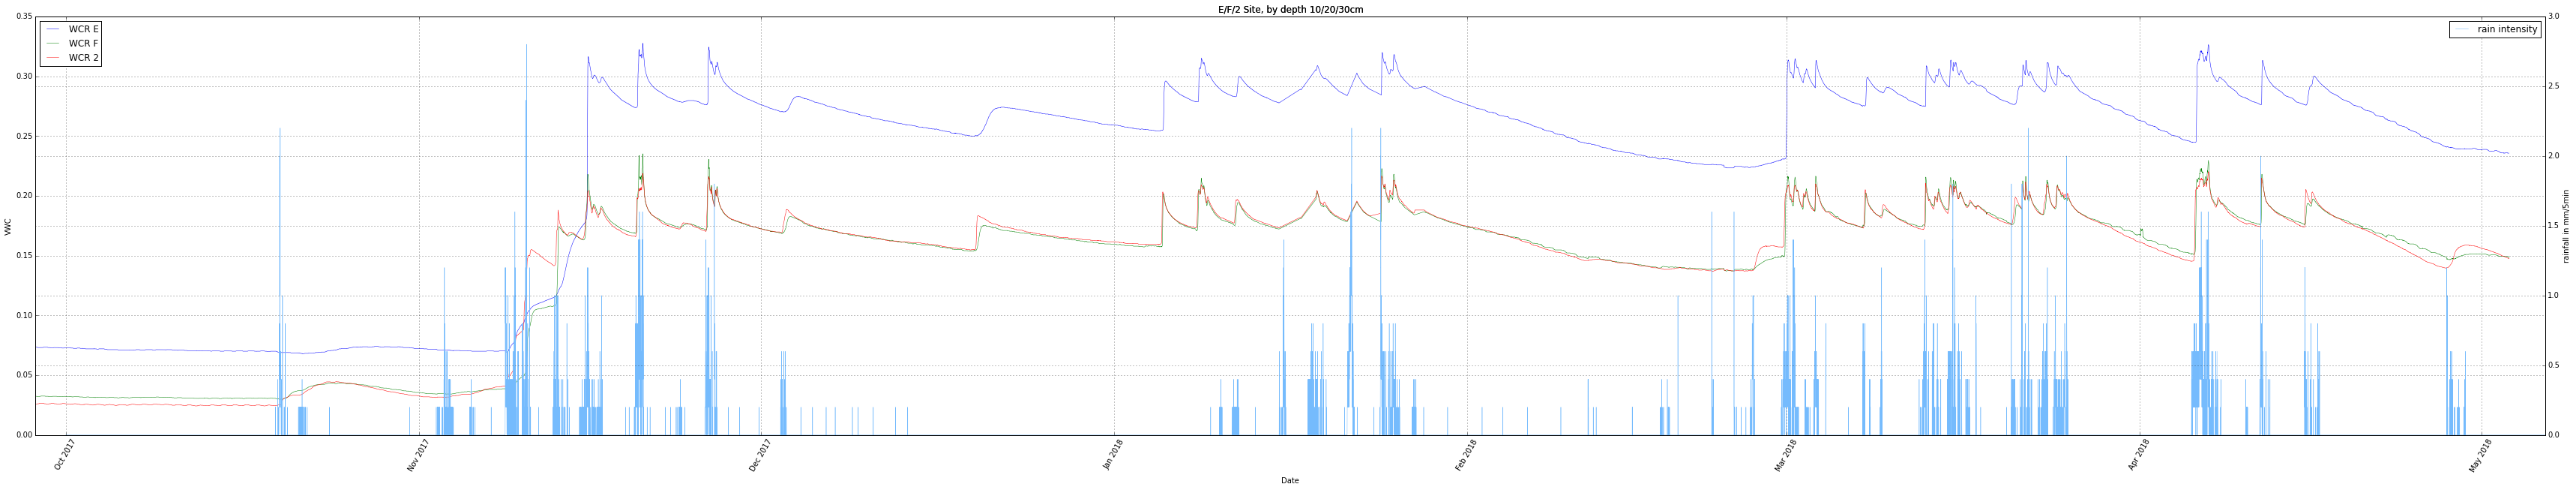

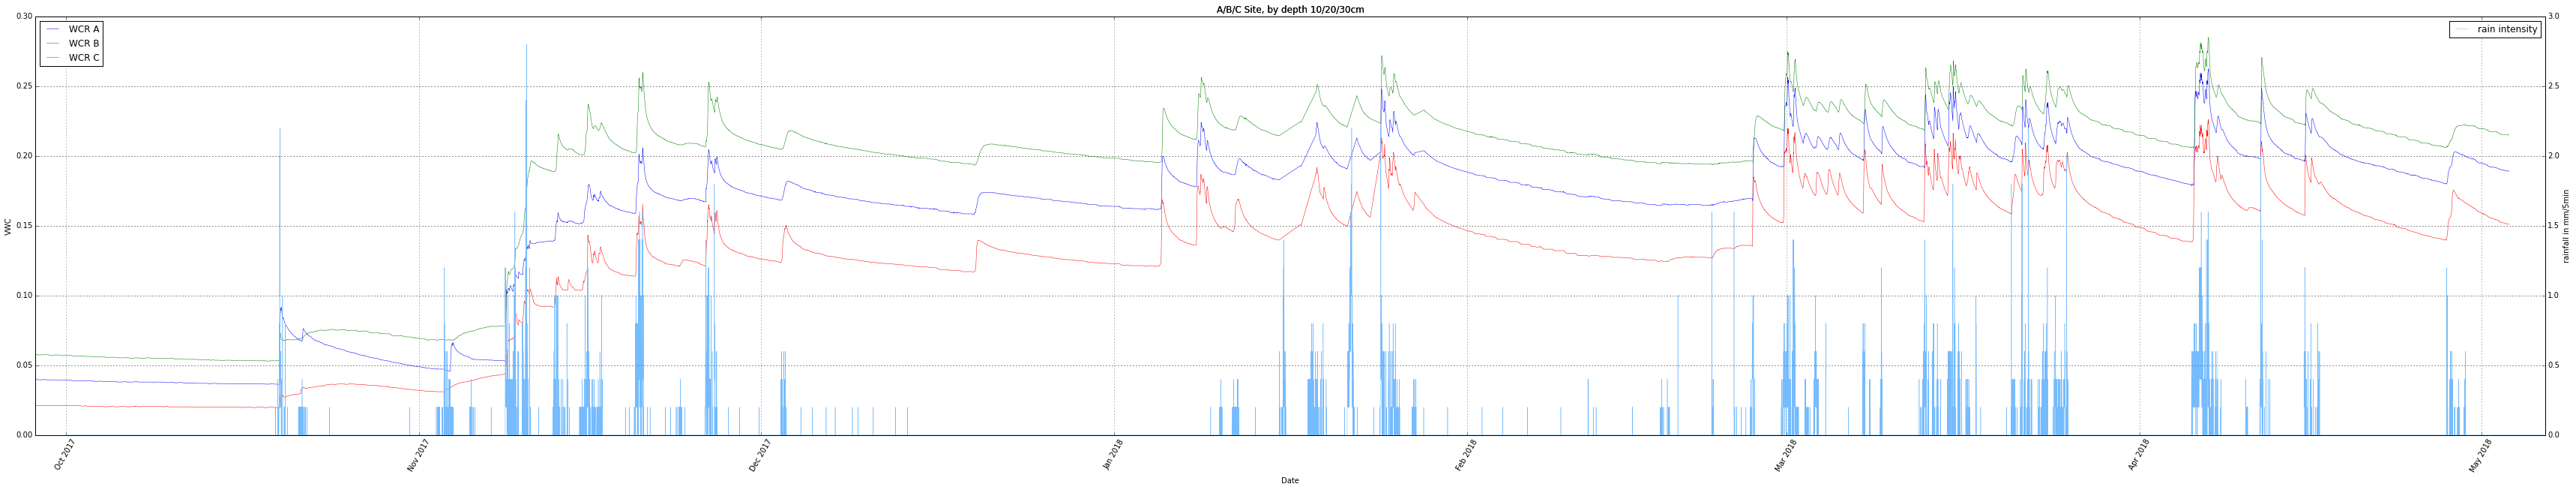

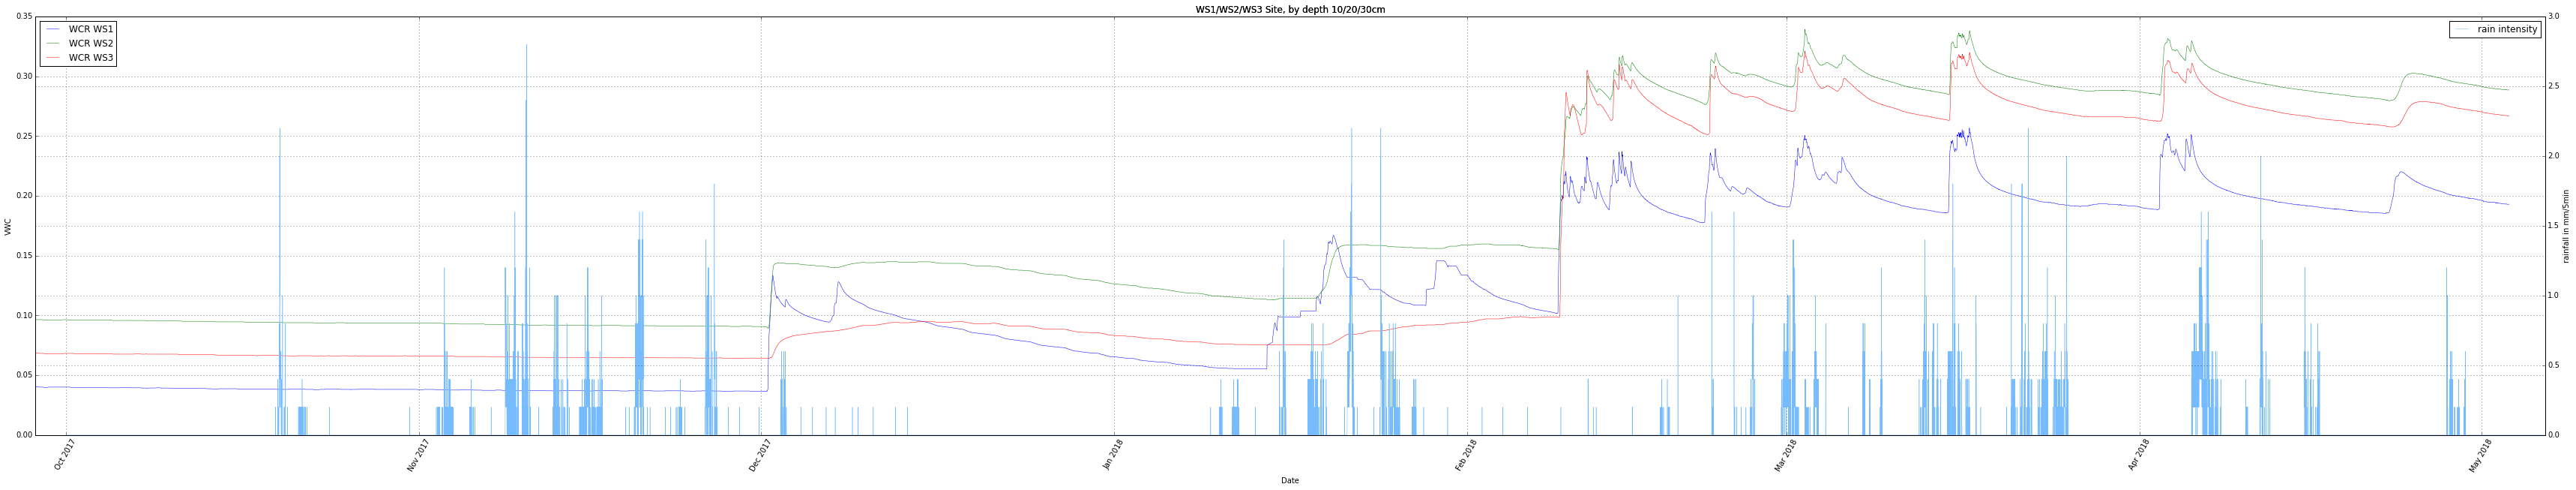

In [129]:
fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH1_CS650, label = 'WCR 0', color='k', marker='+', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH2_CS650, label = 'WCR 1', color='b', linewidth=.5)
ax1.plot(date_CS650, TH3_CS650, label = 'WCR 2', color='g', linewidth=.5)
ax1.plot(date_CS650, TH4_CS650, label = 'WCR 3', color='y', linewidth=.5)
ax1.plot(date_CS650, TH5_CS650, label = 'WCR 4', color='c', linewidth=.5)
ax1.plot(date_CS650, TH6_CS650, label = 'WCR 5', color='r', linewidth=.5)
ax1.plot(date_CS650, TH7_CS650, label = 'WCR 6', color='m', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH8_CS650, label = 'WCR 7', color='y', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH9_CS650, label = 'WCR 8', color='k', linewidth=.5)
ax1.plot(date_CS650, TH10_CS650, label = 'WCR 9', color='b', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH13_CS650, label = 'WCR C', color='#7e1e9c', linewidth=.5)
ax1.plot(date_CS650, TH14_CS650, label = 'WCR D', color='#ff028d', linewidth=.5)
ax1.plot(date_CS650, THWS3_CS650, label = 'WCR WS3', color='#6c3461', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm', 'VWC %')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('south side soil moisture with rain intensity.png')

fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH1_CS650, label = 'WCR 0', color='k', marker='+', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH2_CS650, label = 'WCR 1', color='b', linewidth=.5)
ax1.plot(date_CS650, TH3_CS650, label = 'WCR 2', color='g', linewidth=.5)
ax1.plot(date_CS650, TH4_CS650, label = 'WCR 3', color='y', linewidth=.5)
ax1.plot(date_CS650, TH5_CS650, label = 'WCR 4', color='c', linewidth=.5)
ax1.plot(date_CS650, TH6_CS650, label = 'WCR 5', color='r', linewidth=.5)
ax1.plot(date_CS650, TH7_CS650, label = 'WCR 6', color='m', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH8_CS650, label = 'WCR 7', color='y', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH9_CS650, label = 'WCR 8', color='k', linewidth=.5)
ax1.plot(date_CS650, TH10_CS650, label = 'WCR 9', color='b', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH13_CS650, label = 'WCR C', color='#7e1e9c', linewidth=.5)
ax1.plot(date_CS650, TH14_CS650, label = 'WCR D', color='#ff028d', linewidth=.5)
ax1.plot(date_CS650, THWS3_CS650, label = 'WCR WS3', color='#6c3461', linewidth=2)
legend('South Side Volumetric Water Content at 30 cm', 'VWC %')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('What is up with WS3.png')

fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH1_CS650, label = 'WCR 0', color='k', marker='+', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH2_CS650, label = 'WCR 1', color='b', linewidth=.5)
ax1.plot(date_CS650, TH15_CS650, label = 'WCR E', color='g', linewidth=.5)
ax1.plot(date_CS650, TH4_CS650, label = 'WCR 3', color='y', linewidth=.5)
ax1.plot(date_CS650, TH5_CS650, label = 'WCR 4', color='c', linewidth=.5)
ax1.plot(date_CS650, TH6_CS650, label = 'WCR 5', color='r', linewidth=.5)
ax1.plot(date_CS650, TH7_CS650, label = 'WCR 6', color='m', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH8_CS650, label = 'WCR 7', color='y', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH9_CS650, label = 'WCR 8', color='k', linewidth=.5)
ax1.plot(date_CS650, TH10_CS650, label = 'WCR 9', color='b', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH11_CS650, label = 'WCR A', color='#7e1e9c', linewidth=.5)
ax1.plot(date_CS650, TH14_CS650, label = 'WCR D', color='#ff028d', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm', 'VWC %')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainCmt, rainCmt, label = 'Cumulative rainfall mm', color='#75bbfd', linewidth=3)
legend('South Side Volumetric Water Content at 30 cm', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('south side soil moisture with cumulative rainfall.png')


fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH8_CS650, label = 'WCR 7 downslope', color='r', linewidth=.5)
ax1.plot(date_CS650, TH9_CS650, label = 'WCR 8 downslope', color='r', linewidth=.5)
ax1.plot(date_CS650, TH14_CS650, label = 'WCR D upslope', color='y', linewidth=.5)
ax1.plot(date_CS650, TH15_CS650, label = 'WCR E upslope', color='y', linewidth=.5)
ax1.plot(date_CS650, TH4_CS650, label = 'WCR 3 upslope', color='y', linewidth=.5)
ax1.plot(date_CS650, TH10_CS650, label = 'WCR 9 midslope right', color='g', linewidth=.5)
ax1.plot(date_CS650, TH11_CS650, label = 'WCR A midslope right', color='g', linewidth=.5)
ax1.plot(date_CS650, TH7_CS650, label = 'WCR 6 midslope right', color='g', linewidth=.5)
ax1.plot(date_CS650, TH1_CS650, label = 'WCR 0 midslope left', color='c', linewidth=.5)
ax1.plot(date_CS650, TH2_CS650, label = 'WCR 1 midslope left', color='c', linewidth=.5)
ax1.plot(date_CS650, TH5_CS650, label = 'WCR 4 midslope left', color='c', linewidth=.5)
ax1.plot(date_CS650, TH6_CS650, label = 'WCR 5 midslope left', color='c', linewidth=.5)
#ax1.plot(date_CS650, THWS3_CS650, label = 'WCR WS3 midslope left', color='c', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm grouped by slope position', 'VWC %')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm grouped by slope position', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('slope position soil moisture with rain intensity finer res2.png')

fig, ax1 =plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, T1_CS650, label = 'WCR 0', linewidth=.5)
ax1.plot(date_CS650, T2_CS650, label = 'WCR 1', linewidth=.5)
ax1.plot(date_CS650, T15_CS650, label = 'WCR E', linewidth=.5)
ax1.plot(date_CS650, T4_CS650, label = 'WCR 3', linewidth=.5)
ax1.plot(date_CS650, T5_CS650, label = 'WCR 4', linewidth=.5)
ax1.plot(date_CS650, T6_CS650, label = 'WCR 5', linewidth=.5)
ax1.plot(date_CS650, T7_CS650, label = 'WCR 6', linewidth=.5)
ax1.plot(date_CS650, T8_CS650, label = 'WCR 7', linewidth=.5)
ax1.plot(date_CS650, T9_CS650, label = 'WCR 8', linewidth=.5)
ax1.plot(date_CS650, T10_CS650, label = 'WCR 9', linewidth=.5)
ax1.plot(date_CS650, T11_CS650, label = 'WCR A', linewidth=.5)
ax1.plot(date_CS650, T14_CS650, label = 'WCR D', linewidth=.5)
legend('South Side T Averages', 'T')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('South Side T Averages', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('30 cm soil temperature_with rainfall.png')

fig, ax1=plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, T1_CS650, label = 'WCR 0', linewidth=.5)
ax1.plot(date_CS650, T2_CS650, label = 'WCR 1', linewidth=.5)
ax1.plot(date_CS650, T15_CS650, label = 'WCR E', linewidth=.5)
ax1.plot(date_CS650, T4_CS650, label = 'WCR 3', linewidth=.5)
ax1.plot(date_CS650, T5_CS650, label = 'WCR 4', linewidth=.5)
ax1.plot(date_CS650, T6_CS650, label = 'WCR 5', linewidth=.5)
ax1.plot(date_CS650, T7_CS650, label = 'WCR 6', linewidth=.5)
ax1.plot(date_CS650, T8_CS650, label = 'WCR 7', linewidth=.5)
ax1.plot(date_CS650, T9_CS650, label = 'WCR 8', linewidth=.5)
ax1.plot(date_CS650, T10_CS650, label = 'WCR 9', linewidth=.5)
ax1.plot(date_CS650, T11_CS650, label = 'WCR A', linewidth=.5)
ax1.plot(date_CS650, T14_CS650, label = 'WCR D', linewidth=.5)
ax1.plot(date_CS650, TWS3_CS650, label = 'WCR WS3', linewidth=2)
legend('South Side T Averages', 'T')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('South Side T Averages', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('WS3 weird again.png')

fig=plt.figure(figsize=(60,10))
plt.plot(date_CS650, T8_CS650, label = 'WCR 7 downslope', color='r', linewidth=.5)
plt.plot(date_CS650, T9_CS650, label = 'WCR 8 downslope', color='r', linewidth=.5)
plt.plot(date_CS650, T14_CS650, label = 'WCR D upslope', color='y', linewidth=.5)
plt.plot(date_CS650, T15_CS650, label = 'WCR E upslope', color='y', linewidth=.5)
plt.plot(date_CS650, T4_CS650, label = 'WCR 3 upslope', color='y', linewidth=.5)
plt.plot(date_CS650, T10_CS650, label = 'WCR 9 midslope right', color='g', linewidth=.5)
plt.plot(date_CS650, T11_CS650, label = 'WCR A midslope right', color='g', linewidth=.5)
plt.plot(date_CS650, T7_CS650, label = 'WCR 6 midslope right', color='g', linewidth=.5)
plt.plot(date_CS650, T1_CS650, label = 'WCR 0 midslope left', color='c', linewidth=.5)
plt.plot(date_CS650, T2_CS650, label = 'WCR 1 midslope left', color='c', linewidth=.5)
plt.plot(date_CS650, T5_CS650, label = 'WCR 4 midslope left', color='c', linewidth=.5)
plt.plot(date_CS650, T6_CS650, label = 'WCR 5 midslope left', color='c', linewidth=.5)
legend('South Side Soil T at 30 cm', 'T')
plt.show()
fig.savefig ('slope position 30 cm soil temperature.png')

fig, ax1=plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH15_CS650, label = 'WCR E', linewidth=.5)
ax1.plot(date_CS650, TH16_CS650, label = 'WCR F', linewidth=.5)
ax1.plot(date_CS650, TH3_CS650, label = 'WCR 2', linewidth=.5)
legend('E/F/2 Site, by depth 10/20/30cm', 'VWC')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('E/F/2 Site, by depth 10/20/30cm', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('E_F_2.png')

fig, ax1=plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH11_CS650, label = 'WCR A', linewidth=.5)
ax1.plot(date_CS650, TH12_CS650, label = 'WCR B', linewidth=.5)
ax1.plot(date_CS650, TH13_CS650, label = 'WCR C', linewidth=.5)
legend('A/B/C Site, by depth 10/20/30cm', 'VWC')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('A/B/C Site, by depth 10/20/30cm', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('A_B_C.png')

fig, ax1=plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, THWS1_CS650, label = 'WCR WS1', linewidth=.5)
ax1.plot(date_CS650, THWS2_CS650, label = 'WCR WS2', linewidth=.5)
ax1.plot(date_CS650, THWS3_CS650, label = 'WCR WS3', linewidth=.5)
legend('WS1/WS2/WS3 Site, by depth 10/20/30cm', 'VWC')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('WS1/WS2/WS3 Site, by depth 10/20/30cm', 'rainfall in mm/5min')
ax2.legend(loc='upper right')
plt.show()
fig.savefig ('WS1_WS2_WS3.png')


In [76]:
IntRainfallTB4=rainfallTB4
IntRainfallTB4['datetime']=date_rainTB4
CompRainfallTB4=IntRainfallTB4.set_index('datetime')
CompRainfallTB4['month']=[ts.month for ts in CompRainfallTB4.index] 
CompRainfallTB4['Rain']=CompRainfallTB4.DataValue.values != 0 
CompRainfallTB4.head()

ValueID  DataValue        LocalDateTime  UTCOffset  \
datetime                                                                    
2017-10-01 00:00:00  529382412          0  2017-10-01 00:00:00         -8   
2017-10-01 00:05:00  529382423          0  2017-10-01 00:05:00         -8   
2017-10-01 00:10:00  529382434          0  2017-10-01 00:10:00         -8   
2017-10-01 00:15:00  529382445          0  2017-10-01 00:15:00         -8   
2017-10-01 00:20:00  529382456          0  2017-10-01 00:20:00         -8   

                    SiteCode VariableCode QualifierCode         MethodName  \
datetime                                                                     
2017-10-01 00:00:00     wshq  Rainfall mm             P  TB4mm-L Rain Gage   
2017-10-01 00:05:00     wshq  Rainfall mm             P  TB4mm-L Rain Gage   
2017-10-01 00:10:00     wshq  Rainfall mm             P  TB4mm-L Rain Gage   
2017-10-01 00:15:00     wshq  Rainfall mm             P  TB4mm-L Rain Gage   
2017-10-01 00:20:00     wshq  Rainfall mm             P  TB4mm-L Rain Gage   

                     QualityControlLevelCode        DatastreamName  \
datetime                                                             
2017-10-01 00:00:00                        2  Rainfall mm TB4 WSHQ   
2017-10-01 00:05:00                        2  Rainfall mm TB4 WSHQ   
2017-10-01 00:10:00                        2  Rainfall mm TB4 WSHQ   
2017-10-01 00:15:00                        2  Rainfall mm TB4 WSHQ   
2017-10-01 00:20:00                        2  Rainfall mm TB4 WSHQ   

                      StationName  month   Rain  
datetime                                         
2017-10-01 00:00:00  Angelo HQ WS     10  False  
2017-10-01 00:05:00  Angelo HQ WS     10  False  
2017-10-01 00:10:00  Angelo HQ WS     10  False  
2017-10-01 00:15:00  Angelo HQ WS     10  False  
2017-10-01 00:20:00  Angelo HQ WS     10  False

In [117]:
#select Feb-Sep, times when not raining
HRgo = CompRainfallTB4.loc[(CompRainfallTB4.month > 2)&(CompRainfallTB4.month < 10)&(CompRainfallTB4.Rain == False)] 
#look for consecutive non-rainy days
HRgo['consec']=np.concatenate([[True],pd.to_numeric(np.diff(HRgo.index)) == 300000000000])

#HRgo['consec']=HRgo.loc[()]


In [118]:
#HRgo['consec']
#PH=pd.to_numeric(np.diff(HRgo.index)) == 300000000000
HRgo['consec']=np.concatenate([[True],pd.to_numeric(np.diff(HRgo.index)) == 300000000000])
len(placeholder)
#HRgo['consec']=placeholder
#HRgo
#placeholder=np.concatenate([[True],[(pd.to_numeric(np.diff(HRgo.index)) == 300000000000)]])
#placeholder=pd.to_numeric(np.diff(HRgo.index)) == 300000000000
#np.concatenate([0],np.diff(HRgo.index))

#len(HRgo)

17424

In [73]:
#CompRainfallTB4['month']=[ts.month for ts in CompRainfallTB4.index] 
#CompRainfallTB4['Rain']=CompRainfallTB4.DataValue.values != 0 
#size(CompRainfallTB4.Rain)
#CompRainfallTB4['RainPeriod1']=np.diff(np.concatenate([[True], CompRainfallTB4.Rain]))
#CompRainfallTB4['RainPeriod2']=np.flatnonzero(np.diff(np.concatenate([[True], CompRainfallTB4.Rain])))
#size(np.nonzero(np.diff(np.concatenate([[True], CompRainfallTB4.Rain]))))
#CompRainfallTB4[11500:11550]
#placeholder=np.flatnonzero(np.concatenate([[True], Rain]))
#placeholder=np.diff(np.flatnonzero(np.diff(np.concatenate([[True], Rain]))))
#placeholder[::2]

2387

In [ ]:
#analyze wiggles step 1: 
#first find the longest falling limbs according to AM TB4 gauge, post February  

def HRSeason(df,col_name):
    df['month']=[ts.month for ts in df.index]   
    #rain=df.loc[(df.DataValues.values != 0)]
    rain=df.DataValues.values != 0 
    placeholder=np.diff(np.flatnonzero(np.diff(np.concatenate([[True], rain]))))
    # select 
        HRgo = df.loc[(df.index.month > 2)&(df.index.month < 10)] #Feb-Sep
        
            means_dry[y] = df_dry.mean(axis=0).loc[col_name]
        except KeyError:
            print ('failed for sensor', col_name, y)
    df=df.drop('year',axis=1,inplace=True)   # drop column added
    print (col_name)
    print ('wet season:', means_wet)
    print ('dry season:', means_dry)
    return [means_wet, means_dry]
def max_zeros(c):
    v = c.values != 0
    d = np.diff(np.flatnonzero(np.diff(np.concatenate([[True], v]))))
    return d[::2].max()
#trim TB4 data to desired range: 


